In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Bases de datos de bebidas y comidas

In [ ]:
df=pd.read_csv('Sales TEC_Valid.csv') #se importa base de datos

In [ ]:
df['ProductType'].unique() #se ve que tipo de productos hay para eliminar los que no nos sirven

array(['Botanas', 'Licores', 'Vivabus', 'Transportaciones CUN',
       'Galletas', 'Specials', 'Bebidas Calientes', 'COMBOS CREW',
       'Hertz.', 'OFERTAS ', 'Transportaciones MTY',
       'Transportaciones TLC', 'VIVA PLAY', 'VIVA Taxis', 'Antros',
       'VivaTransfer', 'Alimentos Charter', 'Perecederos', 'Refrescos',
       'Sopas', 'Lacteos'], dtype=object)

In [ ]:
#Se crea una nueva base de datos con solo los productos que nos interesan
food_types = ("Botanas", "Refrescos", "Licores", "Perecederos", "Galletas", "Bebidas Calientes", "Sopas", "Lacteos")
food_sales = df[df["ProductType"].isin(food_types)]
food_sales = food_sales[food_sales["TotalSales"] >= 0]

In [ ]:
# Se separan los productos en bebidas y alimentos
comidast = ("Botanas","Perecederos", "Galletas", "Sopas")
bebidast = ( "Refrescos", "Licores", "Bebidas Calientes", "Lacteos")

comidas = df[df["ProductType"].isin(comidast)]
comidas = comidas[comidas["TotalSales"] >= 0]

bebidas = df[df["ProductType"].isin(bebidast)]
bebidas = bebidas[bebidas["TotalSales"] >= 0]

In [ ]:
# Se guarda en una variable la cantidad total de vuelos que se tienen en la base de datos
numvuelos = food_sales['Flight_ID'].nunique()
numvuelos

108797

In [ ]:
# se crean diferentes arreglos para crear una nueva base de datos con información sobre
# ventas totales por comida y promedio de venta por vuelo
ttlcomidas = []
vencomidas = []
typcomidas = []
for i in comidas['ProductName'].unique():
  ttlcomidas.append(i)
  vencomidas.append(comidas.loc[comidas['ProductName'] == i]['Quantity'].sum())
  typcomidas.append(comidas.loc[comidas['ProductName'] == i]['ProductType'].iloc[0])

In [ ]:
avgcom=[]
for i in vencomidas:
  avgcom.append((i/numvuelos))

In [ ]:
vend_coms = pd.DataFrame({'comida':ttlcomidas,'tipo':typcomidas,'vendido':vencomidas,'avg':avgcom})
vend_coms = vend_coms.sort_values(by = ['avg'], ascending = False) # Se ordena la tabla por ventas promedio del producto por vuelo

In [ ]:
# A parte, se agrega una columna manualmente que indica por producto la cantidad que guardan en el avión
# alimentos para los cuales no tenemos la información sobre cuantos se guardan se pusieron en 0.
capcomidas = [26, 16, 26, 12, 26, 14, 4, 12, 12, 8, 6, 8, 6, 4, 4, 12, 0, 14, 4, 0, 11, 4, 4, 4, 2, 0, 0, 2, 2, 3, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vend_coms.insert(4, "capacity", capcomidas, True)

In [ ]:
vend_coms.head()

,comida,tipo,vendido,avg,capacity
48,Sabritas Originales,Botanas,314645,2.892037,26
32,Ruffles Queso,Botanas,231712,2.129765,16
30,Doritos Nacho,Botanas,220464,2.026379,26
34,Panini Clasico,Perecederos,171341,1.574869,12
43,Fritos Limon Y Sal,Botanas,153884,1.414414,26


In [ ]:
#Se repite el procesa para bebidas
ttlbeb = []
venbeb = []
typbeb = []
for i in bebidas['ProductName'].unique():
  ttlbeb.append(i)
  typbeb.append(bebidas.loc[bebidas['ProductName'] == i]['ProductType'].iloc[0])
  venbeb.append(bebidas.loc[bebidas['ProductName'] == i]['Quantity'].sum())

avgbeb=[]
for i in venbeb:
  avgbeb.append((i/numvuelos))

In [ ]:
vend_bebs= pd.DataFrame({'bebida':ttlbeb,'tipo':typbeb,'vendido':venbeb, 'avg':avgbeb})
vend_bebs = vend_bebs.sort_values(by = ['avg'], ascending = False)

In [ ]:
capbeb = [56, 50, 10, 12, 10, 4, 6, 4, 6, 10, 4, 10, 10, 6, 14, 6, 25, 0, 2,2, 4, 0, 6, 3, 8, 2, 3, 2, 0, 2, 2, 4, 0, 4, 2, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vend_bebs.insert(4, "capacity", capbeb, True)

In [ ]:
vend_bebs.head()

,bebida,tipo,vendido,avg,capacity
40,Coca Cola Regular,Refrescos,667641,6.136575,56
44,Agua Natural 600 Ml,Refrescos,531050,4.881109,50
24,Sprite,Refrescos,137929,1.267765,10
33,Coca Cola Dieta,Refrescos,118477,1.088973,12
34,Coca Sin Azucar,Refrescos,110835,1.018732,10


## Gráficas

Graficamos primero ventas totales para bebidas y las botanas más vendidas

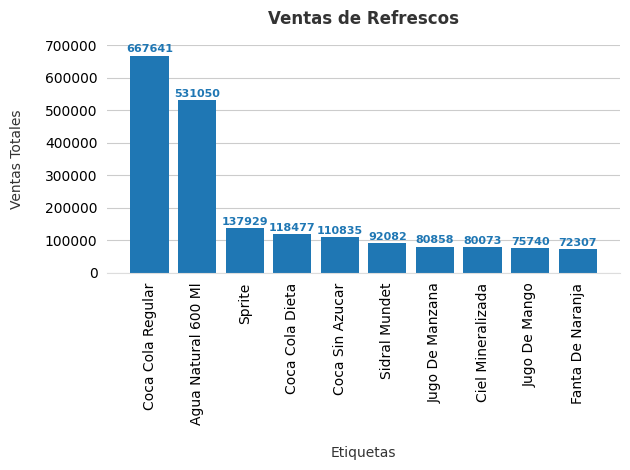

In [ ]:
from matplotlib.pyplot import plot, savefig

# Se crean las barras de la gráfica
fig, ax = plt.subplots()
Refrescos = vend_bebs['bebida'].loc[(vend_bebs['tipo'] == 'Refrescos')]
bars = ax.bar(
    x=Refrescos,
    height=vend_bebs['vendido'].loc[(vend_bebs['tipo'] == 'Refrescos')]
)

# Se ajusta el diseño de la gráfica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#CCCCCC')
ax.xaxis.grid(False)
plt.xticks(rotation=90)

# Se le agrega el valor total arriba de cada elemento
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 10000.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold',
      fontsize = 8
  )

ax.set_xlabel('Etiquetas', labelpad=15, color='#333333')
ax.set_ylabel('Ventas Totales', labelpad=15, color='#333333')
ax.set_title('Ventas de Refrescos', pad=15, color='#333333',weight='bold')

fig.tight_layout()

savefig('refrescos.png', transparent=True)

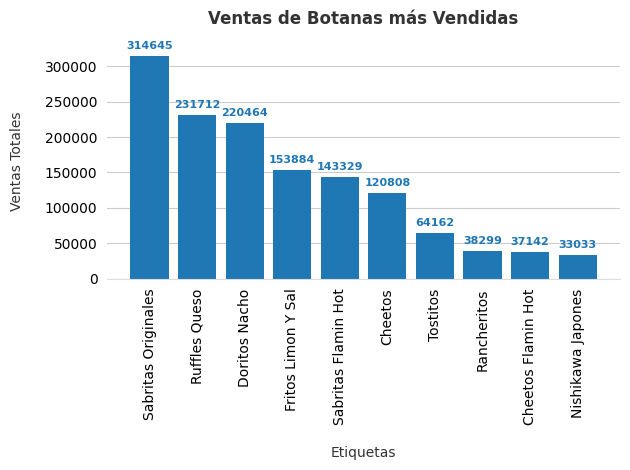

In [ ]:
# Se crean las barras de la gráfica
fig, ax = plt.subplots()
Botanas = vend_coms['comida'].loc[(vend_coms['tipo'] == 'Botanas')].iloc[:10]
bars = ax.bar(
    x=Botanas,
    height=vend_coms['vendido'].loc[(vend_coms['tipo'] == 'Botanas')].iloc[:10]
)

# Se ajusta el diseño de la gráfica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#CCCCCC')
ax.xaxis.grid(False)
plt.xticks(rotation=90)

# Se le agrega el valor total arriba de cada elemento
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 10000.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold',
      fontsize = 8
  )

ax.set_xlabel('Etiquetas', labelpad=15, color='#333333')
ax.set_ylabel('Ventas Totales', labelpad=15, color='#333333')
ax.set_title('Ventas de Botanas más Vendidas', pad=15, color='#333333',weight='bold')

fig.tight_layout()
savefig('botanas.png', transparent=True)

Las siguientes gráficas muestran una comparación entre la cantidad de espacio de almacenamiento que se le dan a los productos con un estimado de ventas de los productos que en un avión activo, se estima que en un día como mínimo este consume 4 veces el promedio de venta por producto.

Si una barra sobrepasa un punto, nos indica que lo más probable es que con una sola carga al día, este producto se agote.

Text(0, 0.5, 'Cantidad de Productos')

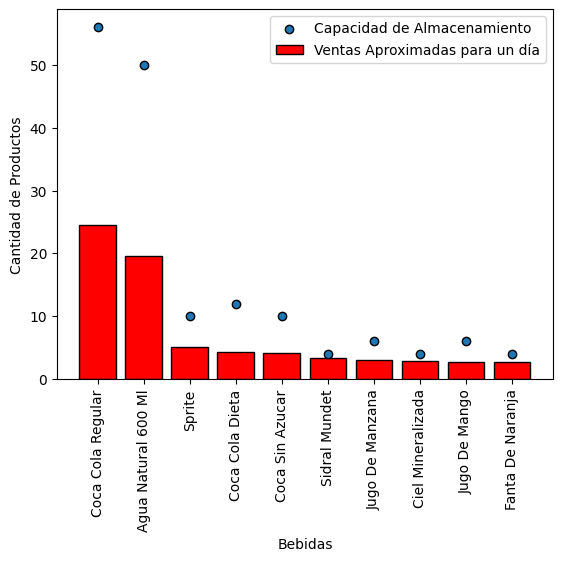

In [ ]:
plt.xticks(rotation=90)
# se calcula el estimado de ventas por día de un avión ocupado
estRef = vend_bebs['avg'].loc[(vend_bebs['tipo'] == 'Refrescos')].apply(lambda x: x*4)

# Se seleccionan los refrescos
Refrescos = vend_bebs['bebida'].loc[(vend_bebs['tipo'] == 'Refrescos')]

# Gráfico de barras mostrando la venta esperada al dia de los refrescos
plt.bar(Refrescos, estRef, color='red', edgecolor= 'black', label = 'Ventas Aproximadas para un día')

# Se le agregan punto que muestran la cantidad de almacenamiento que ocupa la bebida
plt.scatter(Refrescos, vend_bebs['capacity'].loc[(vend_bebs['tipo'] == 'Refrescos')], edgecolor= 'black', label = 'Capacidad de Almacenamiento')
plt.legend(loc="upper right")
plt.xlabel('Bebidas')
plt.ylabel('Cantidad de Productos')

Text(0, 0.5, 'Cantidad de Productos')

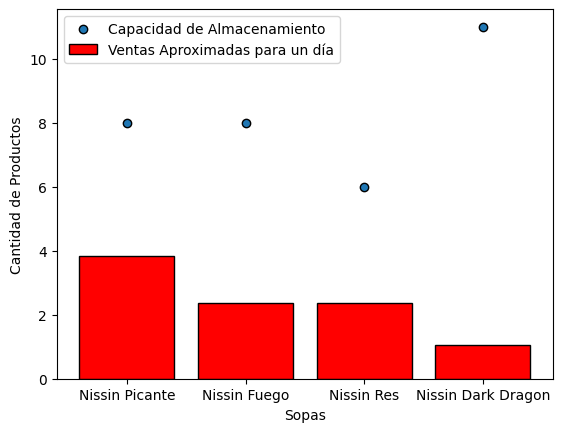

In [ ]:
# Se lleva a cabo el mismo procedimiento que la gráfica anterior pero para hacer más fácil el cambio de tipo de producto
# Se crea una variable que lo define

Producttype = 'Sopas'
est = vend_coms['avg'].loc[(vend_coms['tipo'] == Producttype) & (vend_coms['capacity'] != 0)].apply(lambda x: x*4)
Comidas = vend_coms['comida'].loc[(vend_coms['tipo'] == Producttype) & (vend_coms['capacity'] != 0)]
plt.bar(Comidas, est, color='red', edgecolor= 'black', label = 'Ventas Aproximadas para un día')
plt.scatter(Comidas, vend_coms['capacity'].loc[(vend_coms['tipo'] == Producttype) & (vend_coms['capacity'] != 0)], edgecolor= 'black', label = 'Capacidad de Almacenamiento')
plt.legend(loc="upper left")
plt.xlabel('Sopas')
plt.ylabel('Cantidad de Productos')

Text(0, 0.5, 'Cantidad de Productos')

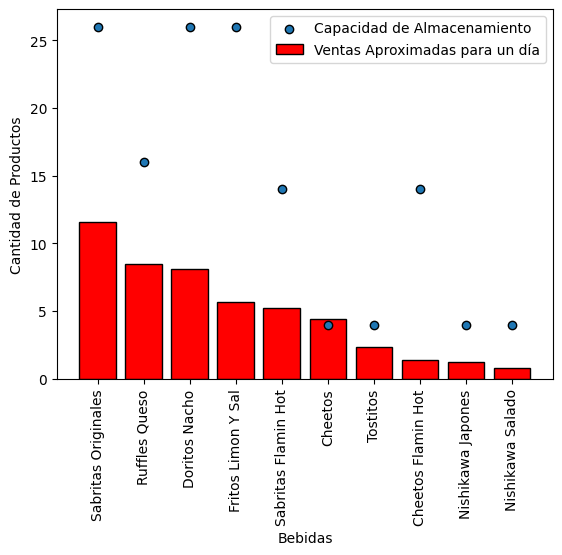

In [ ]:
plt.xticks(rotation=90)
Producttype2 = 'Botanas'
est = vend_coms['avg'].loc[(vend_coms['tipo'] == Producttype2) & (vend_coms['capacity'] != 0)].apply(lambda x: x*4).iloc[:10]
Comidas = vend_coms['comida'].loc[(vend_coms['tipo'] == Producttype2) & (vend_coms['capacity'] != 0)].iloc[:10]
plt.bar(Comidas, est, color='red', edgecolor= 'black', label = 'Ventas Aproximadas para un día')
plt.scatter(Comidas, vend_coms['capacity'].loc[(vend_coms['tipo'] == Producttype2) & (vend_coms['capacity'] != 0)].iloc[:10], edgecolor= 'black', label = 'Capacidad de Almacenamiento')
plt.legend(loc="upper right")
plt.xlabel('Bebidas')
plt.ylabel('Cantidad de Productos')